<a href="https://colab.research.google.com/github/lilian662/EDO/blob/main/07_05_25EDPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

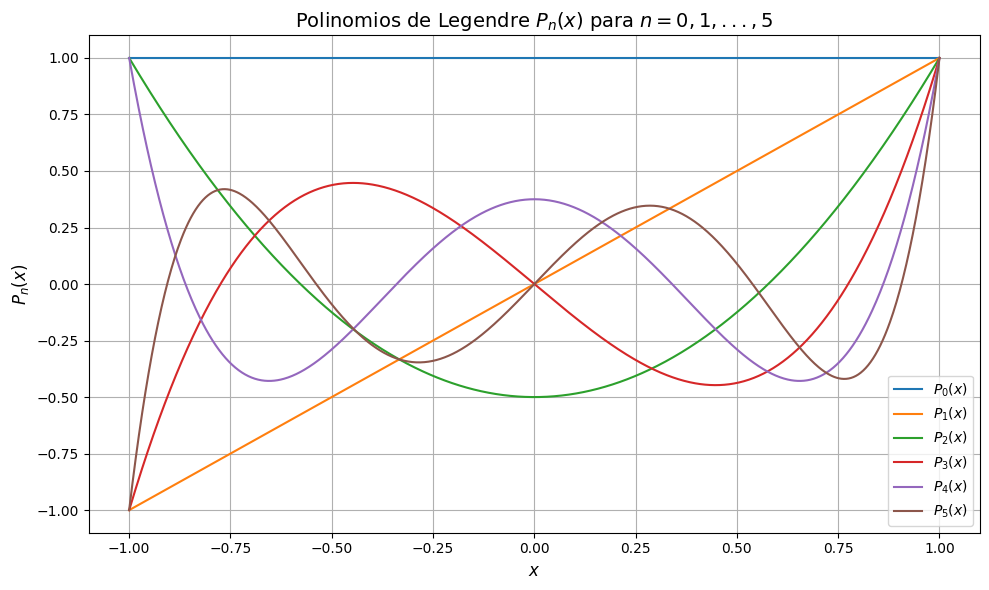

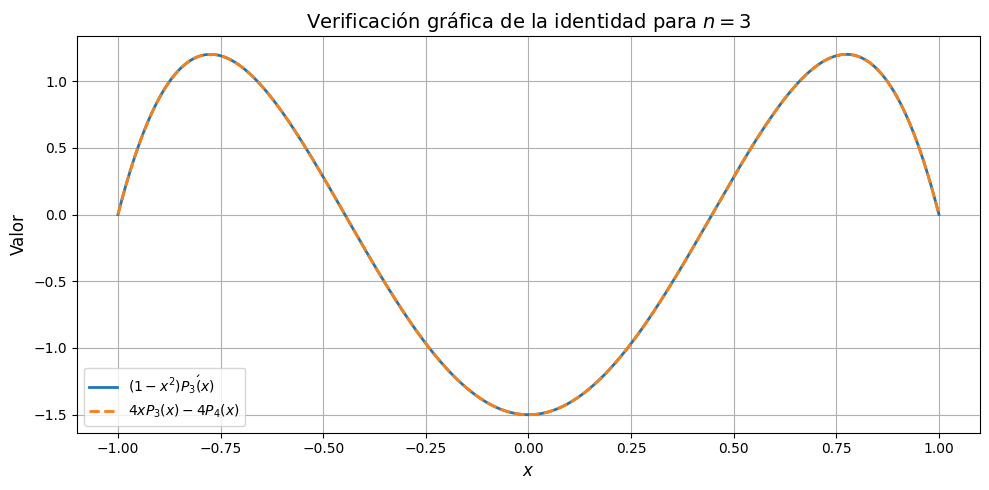

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.special import legendre

# --- Configuración general ---
x = sp.Symbol('x')
x_vals = np.linspace(-1, 1, 1000)
n = 3  # Para el inciso (b)

# ==============================
# (a) Graficar P_n(x) para n = 0,...,5
# ==============================
plt.figure(figsize=(10, 6))
for i in range(6):
    Pn = legendre(i)  # scipy devuelve un objeto evaluable
    plt.plot(x_vals, Pn(x_vals), label=fr'$P_{{{i}}}(x)$')

plt.title('Polinomios de Legendre $P_n(x)$ para $n=0,1,...,5$', fontsize=14)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$P_n(x)$', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ==============================
# (b) Verificar gráficamente: (1 - x²)Pₙ'(x) = (n+1)xPₙ(x) - (n+1)Pₙ₊₁(x)
# ==============================
# Usamos sympy para trabajar con expresiones simbólicas
Pn_sym = sp.legendre(n, x)
Pn1_sym = sp.legendre(n + 1, x)

# Lado izquierdo: (1 - x²) * Pn'(x)
lhs_expr = (1 - x**2) * sp.diff(Pn_sym, x)

# Lado derecho: (n + 1)xPn(x) - (n + 1)Pn+1(x)
rhs_expr = (n + 1) * x * Pn_sym - (n + 1) * Pn1_sym

# Convertir a funciones numéricas con lambdify
lhs_func = sp.lambdify(x, lhs_expr, 'numpy')
rhs_func = sp.lambdify(x, rhs_expr, 'numpy')

# Graficar ambos lados
plt.figure(figsize=(10, 5))
plt.plot(x_vals, lhs_func(x_vals), label=r'$(1 - x^2)P_3\'(x)$', linewidth=2)
plt.plot(x_vals, rhs_func(x_vals), '--', label=r'$4xP_3(x) - 4P_4(x)$', linewidth=2)
plt.title('Verificación gráfica de la identidad para $n = 3$', fontsize=14)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()







In [8]:
import sympy as sp
#inciso c)
x = sp.Symbol('x')
n = 3

Pn = sp.legendre(n, x)
Pn1 = sp.legendre(n + 1, x)
Pn_deriv = sp.diff(Pn, x)

lhs = (1 - x**2) * Pn_deriv
rhs = (n + 1) * x * Pn - (n + 1) * Pn1

print("¿La identidad es cierta?")
print(sp.simplify(lhs - rhs) == 0)


¿La identidad es cierta?
True


In [7]:
import sympy as sp
#inciso d)
x = sp.Symbol('x')
n = 3

# Polinomios de Legendre
P_n_minus_1 = sp.legendre(n - 1, x)
P_n = sp.legendre(n, x)
P_n_plus_1 = sp.legendre(n + 1, x)

# Expresión de la identidad
expr = (n + 1)*P_n_plus_1 - (2*n + 1)*x*P_n + n*P_n_minus_1
expr_simplificada = sp.simplify(expr)

print("Expresión simplificada:")
print(expr_simplificada)
print("¿Es cero?:", expr_simplificada == 0)


Expresión simplificada:
0
¿Es cero?: True


In [5]:
import sympy as sp

# --- (e) Verificar fórmula de Rodrigues ---
x = sp.Symbol('x')
n_values = range(6)  # n = 0, 1, ..., 5

def rodrigues(n):
    expr = (x**2 - 1)**n
    derivada = sp.diff(expr, x, n)
    return sp.simplify((1 / (2**n * sp.factorial(n))) * derivada)

# Mostrar resultados junto con los polinomios de Legendre de sympy
for n in n_values:
    Pn_legendre = sp.legendre(n, x)
    Pn_rodrigues = rodrigues(n)
    print(f"\n--- n = {n} ---")
    print("Legendre    :", Pn_legendre)
    print("Rodrigues   :", Pn_rodrigues)
    print("Iguales     :", sp.simplify(Pn_legendre - Pn_rodrigues) == 0)


--- n = 0 ---
Legendre    : 1
Rodrigues   : 1
Iguales     : True

--- n = 1 ---
Legendre    : x
Rodrigues   : x
Iguales     : True

--- n = 2 ---
Legendre    : 3*x**2/2 - 1/2
Rodrigues   : 3*x**2/2 - 1/2
Iguales     : True

--- n = 3 ---
Legendre    : 5*x**3/2 - 3*x/2
Rodrigues   : x*(5*x**2 - 3)/2
Iguales     : True

--- n = 4 ---
Legendre    : 35*x**4/8 - 15*x**2/4 + 3/8
Rodrigues   : 35*x**4/8 - 15*x**2/4 + 3/8
Iguales     : True

--- n = 5 ---
Legendre    : 63*x**5/8 - 35*x**3/4 + 15*x/8
Rodrigues   : x*(63*x**4 - 70*x**2 + 15)/8
Iguales     : True
